# Analysis and Visualization of Complex Data
---
## Exercise 02 - Best charts to represent different data or dataset types.

Each type of data or datasets is best visualized by certain kinds of charts, depending on both the targeted audience as well as the personal preferences of the data visualizer. In this exercise you will first simulate different types of data and datasets in python. Randomizations are usefull to understand certain statistical concepts and also as a basis for random sampling, which may be required when dealing with big data. Based on these simulated data, the exercise will consist on choosing the type of chart that you find more adequate to represent the different types of data and datasets.

The objectives of this exercise are to:
1. identify each type of variables and tables that were created.

2. try your best to interpret each line of the code provided by inserting a note in front of each line (it might be usefull to create a jupiter notebook from the markdown file)

2. based on these simulated data, draw sketches of the charts that you find more adequate to represent the different types of data and datasets. You should identify the different axis of the plot, if applicable.

You will use two modules that provide pseudo-random number generators to implement random sampling routines. Have a look [here](https://docs.python.org/3/library/random.html) (random module) and [here](https://numpy.org/doc/stable/reference/random/index.html) (numpy.random module). Both allow to simulate data and take random samples, although np.random allows more pseudo-random generator methods to be implemented.

To run the simulations, you should first import pandas, numpy and random modules (in case you still did not installed these modules, you will need to install beforehand).


In [1]:
# import necessary packages
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Simulate var1
# prepare empty list
var1 = []

# initialize the random number generator
random.seed(24) 

# create list of landcovers
levels = ["Permanent crops", "Irrigated crops", "Managed Forest", "Natural Forest", "Agro-Forestry system", "Urban", "Pasture", "Shrubland" ]

# fill the list var1 iteratively
for _ in range(100): # why is a loop needed?
    # add one element randomly chosen from levels to the list 
    var1 += random.sample(levels, 1) # var1.append(random.sample(levels, 1)) would also work

So we can see that ```var1``` is a list of 100 strings.

In [3]:
## Simulate var2

# initialize random number generator
np.random.seed(24) 

# generate an array containing a uniformly distributed sample of 100 pseudo-random numbers >=0 and <100
var2 = np.random.uniform(0, 100, 100)

So ```var2``` apparently is a numpy array containing a uniformly distributed sample of 100 pseudo-random numbers between >=0 and <100.

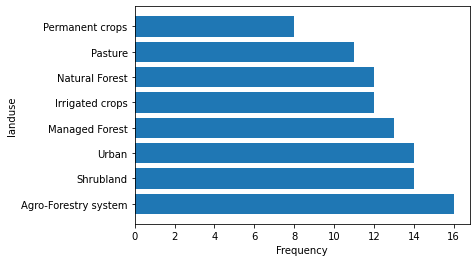

In [4]:
## Simulate table1
# create a dataframe with the values of var1 and its counts and sort by descending order.
table1 = pd.DataFrame(var1).value_counts(sort=True)

# name the first column "landuse"
table1 = table1.rename_axis("landuse")

# name the second column 
table1 = table1.reset_index(name="Frequency")

# draw sketch
# create bars
plt.barh(np.arange(len(table1['landuse'])), table1["Frequency"])
# create names on the y-axis and ax labels
plt.yticks(np.arange(len(table1['landuse'])), table1["landuse"])
plt.ylabel("landuse")
plt.xlabel("Frequency")
plt.show()

```table1``` is a dataframe containing different types of landuse and their respective frequency.

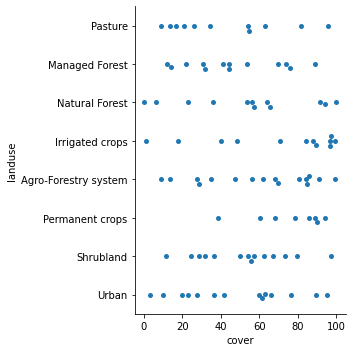

In [5]:
## Simulate table2
# create a dataframe from var1-var2 value pairs and name the columns "landuse" and "cover"
table2 = pd.DataFrame(list(zip(var1, var2)), columns = ["landuse", "cover"])

# Note: The zip() function returns a zip object, which is an iterator of tuples
# where the first item in each passed iterator is paired together, and then the second
# item in each passed iterator are paired together, etc. The tuple() function displays
# a readable version of the result - try running: print(tuple(zip(var1,var2)))

# draw sketch
sns.catplot(data=table2, x="cover", y="landuse", kind="swarm")

```table2``` is a dataframe containing 100 data tuples of landuse type and their respective area covered.

<AxesSubplot: xlabel='Year', ylabel='Temperature'>

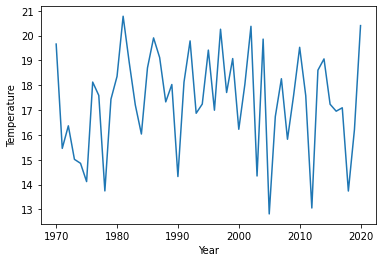

In [6]:
# Simulate table3
# initialize random number generator
np.random.seed(24) # optional: used to fix the seed of the pseudo-random number generator (use any number of your choice)
# create list of integers from 1970 to 2020 (years)
year = list(range(1970,2021))
# create array of 50 normally distributed numbers, mean=17, sd=2
temp = np.random.normal(17,2,51)
table3 = pd.DataFrame(list(zip(year, temp)), columns = ["Year", "Temperature"])

sns.lineplot(data=table3, x='Year', y='Temperature', markers=True)

```table3``` is a dataframe containing for each year 1970-2020 a randomly assigned annual temperature value , normally distributed with mean 17, sd=2.

[0.8333333333333334, 150.0]


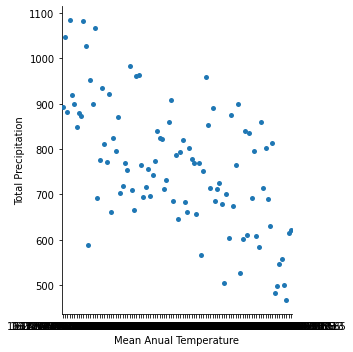

In [7]:
## Simulate table4
# create array of two integers
xx = np.array([16, 21])
# create array of two integers
yy = np.array([300, 1200])

# create a list containing the mean values for both arrays
means = [xx.mean(), yy.mean()]  

# create a list containing their standard deviations divided by three
stds = [xx.std() / 3, yy.std() / 3]
print(stds)

# define a correlation value
corr = -0.7 # correlation

# create a list containing 2 lists -> covariance matrix
covs = [[stds[0]**2          , stds[0]*stds[1]*corr], 
        [stds[0]*stds[1]*corr,           stds[1]**2]] # covariance matrix

# create a dataframe containing a sample of 100 multinormal distributed number pairs for given mean and cov matrix.
table4 = pd.DataFrame(np.random.multivariate_normal(means, covs, 100), columns = ["Mean Anual Temperature", "Total Precipitation"])

#draw sketch
sns.catplot(data=table4, x="Mean Anual Temperature", y="Total Precipitation", kind="swarm")

```table4``` is a dataframe containing 100 multinormal distributed precipitation and temperaature values for the means and stds given above.

C:\Users\johan\AppData\Local\Temp\ipykernel_3644\2727439484.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  table5=table5.pivot('Year','Landuse','Cover')


<AxesSubplot: xlabel='Landuse', ylabel='Year'>

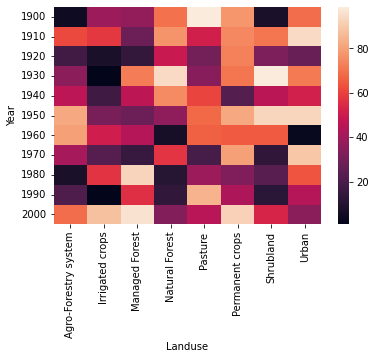

In [8]:
## Simulate table5
# create series of 8 lists of years between 1900 and 2010 in steps of 10
col1 = pd.Series(list(range(1900,2010,10))).repeat(8)
# create a list of labels 
col2 = ["Permanent crops", "Irrigated crops", "Managed Forest", "Natural Forest", "Agro-Forestry system", "Urban", "Pasture", "Shrubland" ]*11
#create a list of uniformly distributed numbers
col3 = np.random.uniform(0, 100, 90)
# build the dataframe
table5 = pd.DataFrame(list(zip(col1, col2, col3)), columns = ["Year", "Landuse", "Cover"])
table5=table5.pivot('Year','Landuse','Cover')
#draw sketch
sns.heatmap(table5)

```table5``` is a dataframe containing for 8 different landuse types and 11 different years (from 1900 to 2010 in steps of 10) their respective landcover (randomly assigned uniformly distributed numbers over die half-open interval from 0 to 100).